In [25]:
#libraries for dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import neighbors
from matplotlib.colors import ListedColormap

In [26]:
#upload dataset

pimaindiab=pd.read_csv("pimaindiab.csv")

X=pimaindiab.iloc[:,0:8]
y=pimaindiab.iloc[:,8]
pimaindiab.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [27]:
#change your meaningless column names

pimaindiab_colnames = ['pregtime', '2hourplasma', 'bloodpl', 'skinfold', '2hourserumins', 'bodyindex', 'pedigree', 'age','class']
pimaindiab.columns = pimaindiab_colnames
pimaindiab.info()
pimaindiab.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
pregtime         767 non-null int64
2hourplasma      767 non-null int64
bloodpl          767 non-null int64
skinfold         767 non-null int64
2hourserumins    767 non-null int64
bodyindex        767 non-null float64
pedigree         767 non-null float64
age              767 non-null int64
class            767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


,pregtime,2hourplasma,bloodpl,skinfold,2hourserumins,bodyindex,pedigree,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


8


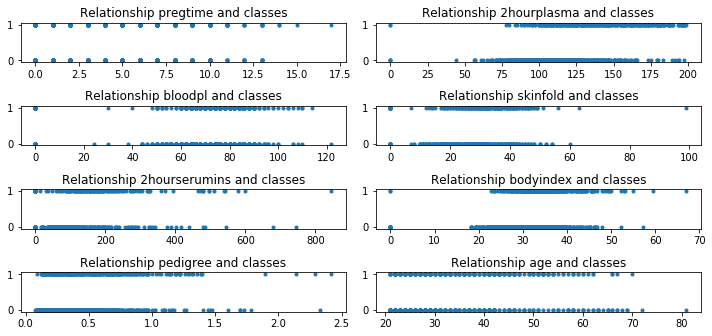

In [28]:
#relationship with classes

def plotFeatures(col_list,title):
    plt.figure(figsize=(10,8))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(pimaindiab[col],pimaindiab["class"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()
        
colnames = ['pregtime', '2hourplasma', 'bloodpl', 'skinfold', '2hourserumins', 'bodyindex', 'pedigree', 'age']
plotFeatures(colnames,"Relationship %s and classes")

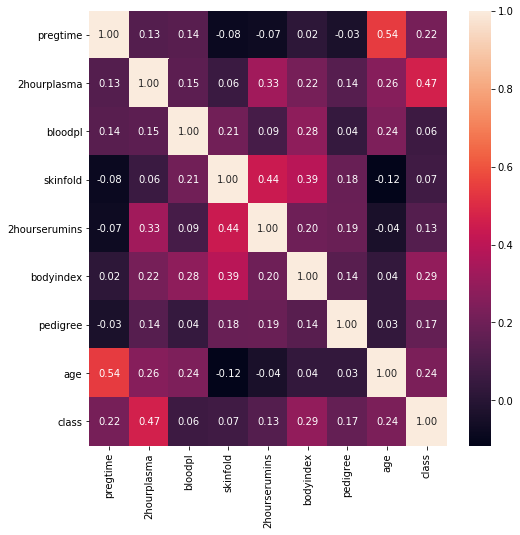

In [29]:
#corr
plt.figure(figsize=(8,8))
sns.heatmap(pimaindiab.corr(),annot=True,fmt='.2f')
plt.show()

In [30]:
#how many data has got 0 or 1 classes?

pimaindiab['class'].value_counts()

0    500
1    267
Name: class, dtype: int64

C:\Users\Havva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Havva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Havva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


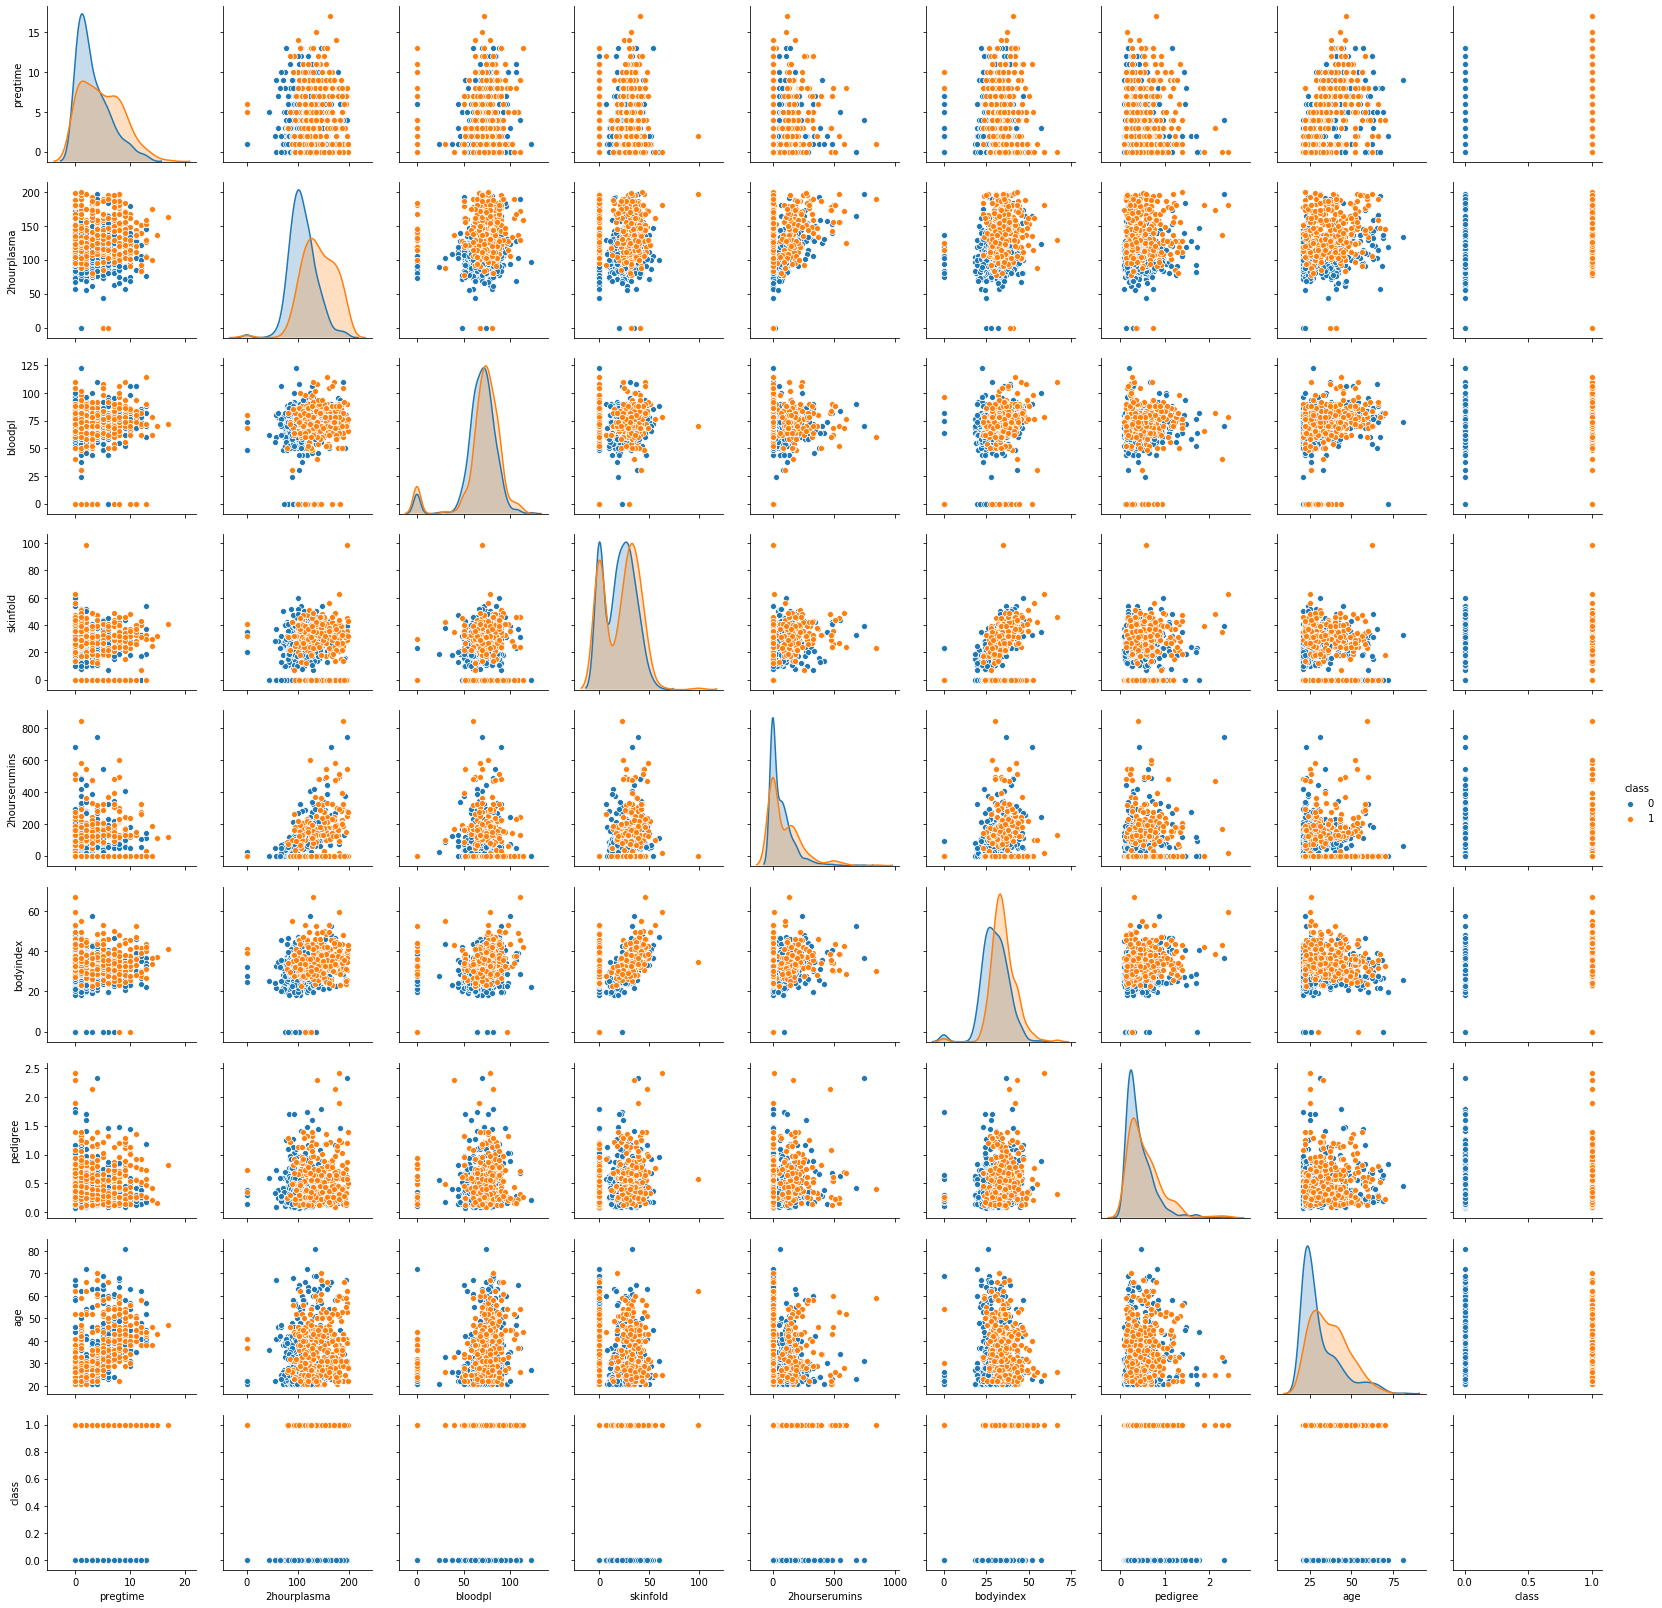

In [31]:
#plot data
sns.pairplot(pimaindiab, hue='class', size=2.5)

In [32]:
#train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [33]:
#SVM ALGORITHM 

from sklearn.svm import SVC
svm=SVC(kernel="linear",gamma=1,C=4)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=4)
print("Cross Val.Score:" , cvs.mean())

Accuracy: 0.807
Confusion Matrix:
 [[120  11]
 [ 26  35]]
Cross Val.Score: 0.7512080352597594


In [34]:
#parameter optimization for svm 

from sklearn.model_selection import GridSearchCV
param=[{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[1,0.5,0.1,0.01,0.001,0.20,0.020]},
    {'C':[1,2,3,4,5],'kernel':['linear'],'gamma':[1,0.5,0.1,0.01,0.001,0.20,0.020]}]
gs=GridSearchCV(estimator=svm,param_grid=param,scoring='accuracy',cv=4,n_jobs=-1)
       
grid_search=gs.fit(X_train,y_train)
bestresult=grid_search.best_score_
bestparameters=grid_search.best_params_
print(bestresult,"this is best cross val score")
print(bestparameters,"these are best parameters")

C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7513043478260869 this is best cross val score
{'C': 4, 'gamma': 1, 'kernel': 'linear'} these are best parameters


In [35]:
#KNN ALGORITHM
 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=4)
print("Cross Val.Score:" , cvs.mean())

Accuracy: 0.734
Confusion Matrix:
 [[117  14]
 [ 37  24]]
Cross Val.Score: 0.7060561684484098


In [36]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(estimator=gnb,X=X_train,y=y_train,cv=4)
print("Cross Val.Score:" , cvs.mean())

Accuracy: 0.792
Confusion Matrix:
 [[114  17]
 [ 23  38]]
Cross Val.Score: 0.7269019773330119


In [37]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(solver='lbfgs',C=0.1)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(estimator=logr,X=X_train,y=y_train,cv=4)
print("Cross Val.Score:" , cvs.mean())

Accuracy: 0.797
Confusion Matrix:
 [[118  13]
 [ 26  35]]
Cross Val.Score: 0.770293954130161


C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [38]:
#parameter optimization for Logistic Regression

from sklearn.model_selection import GridSearchCV
param=[{'solver':['lbfgs', 'sag', 'saga'],'C':[1,2,0.05,0.10,5,10,50,100]},
      {'penalty':['none', 'l2'],'solver':['newton-cg'],'C':[1,2,0.05,0.10,5,10,50,100]}]
gs=GridSearchCV(estimator=logr,param_grid=param,scoring='accuracy',cv=4,n_jobs=-1)
       
grid_search=gs.fit(X_train,y_train)
bestresult=grid_search.best_score_
bestparameters=grid_search.best_params_
print(bestresult,"this is best cross val score")
print(bestparameters,"these are best parameters")


0.7739130434782608 this is best cross val score
{'C': 0.1, 'solver': 'lbfgs'} these are best parameters


C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
